In [41]:
import sys
import os
import shutil
import time
import pickle
import numpy as np

import tensorflow as tf
import keras.preprocessing.image as kpi
import keras.layers as kl
import keras.optimizers as ko
import keras.backend as k
import keras.models as km
import keras.applications as ka

from matplotlib import pyplot as plt
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14008193566883916094
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6963920896
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10510367713050213594
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:04:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [42]:
MODE = "GPU" if "GPU" in [k.device_type for k in device_lib.list_local_devices()] else "CPU"
print(MODE)

GPU


In [43]:
data_dir = "C:/Users/maxjo/OneDrive/Bureau/Code/Python/what the cat/images"

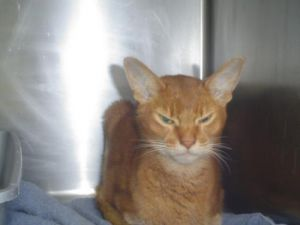

In [44]:
img = kpi.load_img(data_dir+'/Abyssinian/8225343_254.jpg')
img

In [45]:
epochs = 10
batch_size=20
img_width = 150
img_height = 150

In [46]:
train_datagen = kpi.ImageDataGenerator(rescale=1./255,
                                       validation_split=0.2)


train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 101309 images belonging to 67 classes.
Found 25293 images belonging to 67 classes.


In [47]:
model_conv = km.Sequential()
model_conv.add(kl.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), data_format="channels_last"))
model_conv.add(kl.Activation('relu'))
model_conv.add(kl.MaxPooling2D(pool_size=(2, 2)))

model_conv.add(kl.Conv2D(32, (3, 3)))
model_conv.add(kl.Activation('relu'))
model_conv.add(kl.MaxPooling2D(pool_size=(2, 2)))

model_conv.add(kl.Conv2D(64, (3, 3)))
model_conv.add(kl.Activation('relu'))
model_conv.add(kl.MaxPooling2D(pool_size=(2, 2)))

model_conv.add(kl.Flatten())
model_conv.add(kl.Dense(64))
model_conv.add(kl.Activation('relu'))
model_conv.add(kl.Dropout(0.5))
model_conv.add(kl.Dense(1))
model_conv.add(kl.Activation('sigmoid'))

model_conv.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model_conv.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 activation_20 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 activation_21 (Activation)  (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                 

In [48]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

ts = time.time()
# model_conv.fit_generator(train_generator, epochs=epochs,
#        validation_data=validation_generator)

model_conv.fit(
    train_generator,
    steps_per_epoch = train_generator.samples,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples,
    epochs = epochs)

te = time.time()
t_learning_conv_simple_model = te-ts
print("Learning Time for %d epochs : %d seconds"%(epochs,t_learning_conv_simple_model))
model_conv.save(data_dir+'/'+MODE+'_models_convolutional_network_%d_epochs_%d_batch_size.h5' %(epochs, batch_size))

Epoch 1/300


C:\Users\maxjo\AppData\Local\Temp\ipykernel_25768\2196252923.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_conv.fit_generator(


   327/101309 [..............................] - ETA: 1:08:19 - loss: -58595848192.0000 - accuracy: 0.0078

KeyboardInterrupt: 